In [1]:
def prep_store_data(df):
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['sales_total'] = df.quantity * df.item_price
    return df

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import acquire as a

In [4]:
endpoint_items = '/api/v1/items'
target_items = 'items'

endpoint_stores = '/api/v1/stores'
target_stores = 'stores'

endpoint_sales = '/api/v1/sales'
target_sales = 'sales'

In [5]:
domain = 'https://python.zgulde.net'

In [9]:
df = a.acquire_merge_dfs()

Using cached csv
Using cached csv
Using cached csv


In [10]:
df = prep_store_data(df)

In [11]:
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,2013,294.00


In [22]:
# Split
train = df[:'2016']
test = df['2017']

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_5155/1025816190.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [24]:
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,2013,294.00


In [25]:
y = df.sales_total

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

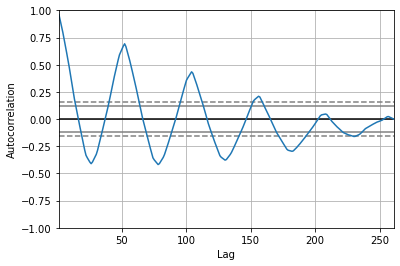

In [27]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

In [28]:
y = y.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-79.093974,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-82.822344,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-83.626435,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-84.095204,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-82.120101,NaN


<AxesSubplot:xlabel='sale_date'>

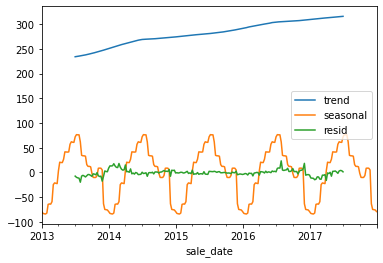

In [29]:
decomposition.iloc[:, 1:].plot()


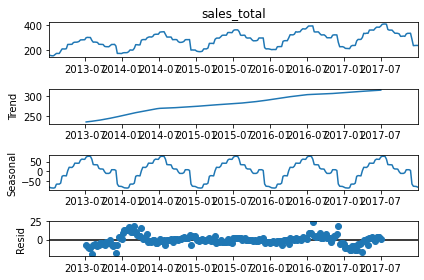

In [32]:
result.plot()
None

In [12]:
######

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  year           913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(8), obj

In [14]:
df.shape

(913000, 16)

In [15]:
df.describe()

,item_id,quantity,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,month,year,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,5.160400,2.384688e+11,2.384688e+11,78224.800000,6.523549,2015.000548,280.898866
std,14.430878,28.801144,263560.542223,2.872283,2.737764,2.978005e+11,2.978005e+11,16.479087,3.448535,1.414021,227.686575
min,1.000000,0.000000,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,78201.000000,1.000000,2013.000000,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,2.970000,3.367410e+10,3.367410e+10,78217.000000,4.000000,2014.000000,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,5.195000,7.103651e+10,7.103651e+10,78220.500000,7.000000,2015.000000,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,7.520000,6.030842e+11,6.030842e+11,78232.000000,10.000000,2016.000000,402.780000
max,50.000000,231.000000,913000.000000,10.000000,9.640000,8.846237e+11,8.846237e+11,78253.000000,12.000000,2017.000000,2104.410000


In [16]:
df.isnull().sum()[df.isnull().sum()] == 0

item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
dtype: bool

Column: item_id


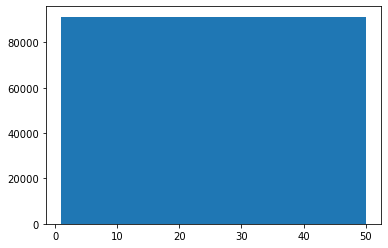

Column: quantity


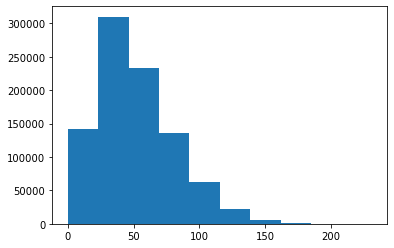

Column: sale_id


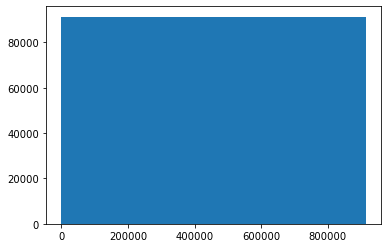

Column: store_id


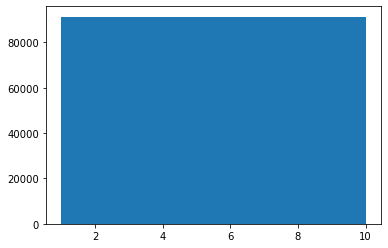

Column: item_brand


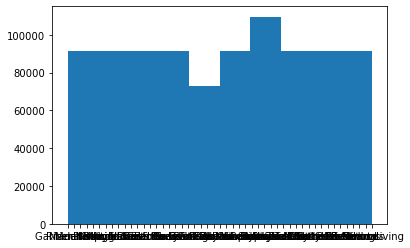

Column: item_name


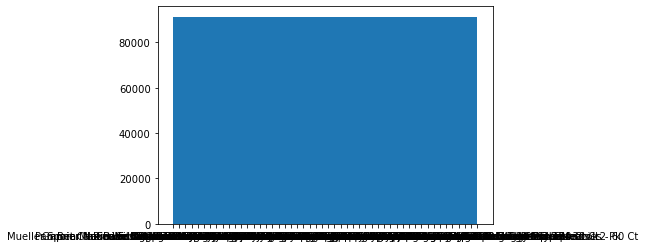

Column: item_price


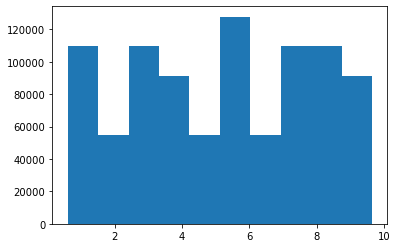

Column: item_upc12


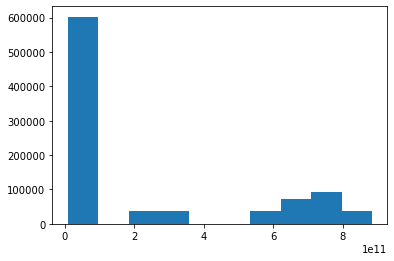

Column: item_upc14


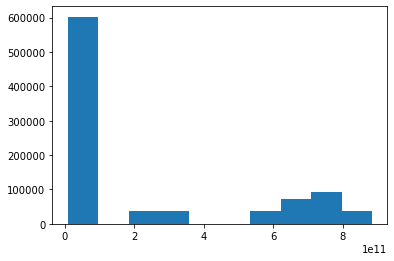

Column: store_address


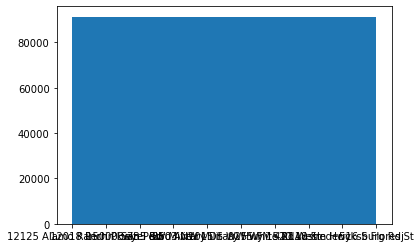

Column: store_city


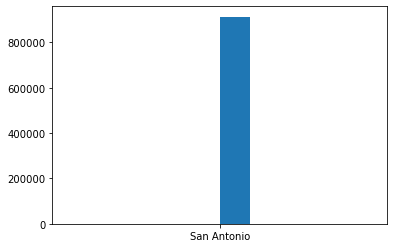

Column: store_state


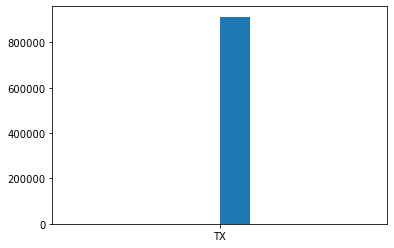

Column: store_zipcode


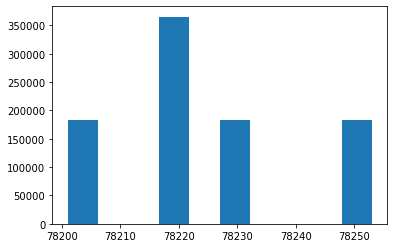

Column: month


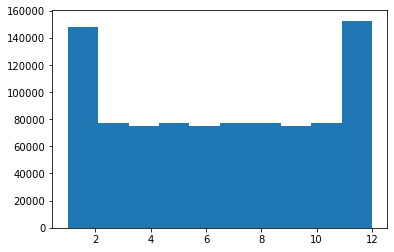

Column: year


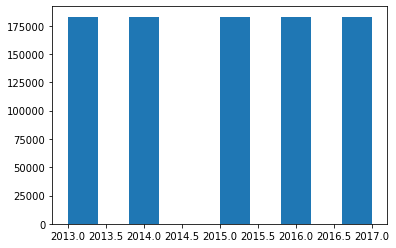

Column: sales_total


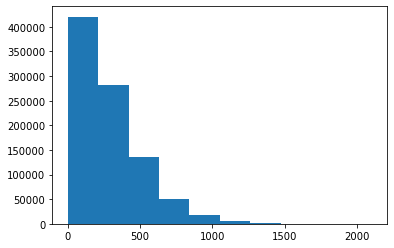

In [17]:
for col in df.columns:
    print('Column: ' + col)
    plt.hist(df[col])
    plt.show()

In [18]:
df.columns

Index(['item_id', 'quantity', 'sale_id', 'store_id', 'item_brand', 'item_name',
       'item_price', 'item_upc12', 'item_upc14', 'store_address', 'store_city',
       'store_state', 'store_zipcode', 'month', 'year', 'sales_total'],
      dtype='object')

In [20]:
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,2013,294.00
